In [28]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *
import pandas as pd


from gp_fijando_operaciones import *

In [29]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


**Parámetros**

In [30]:
funcdict = {
	'add' : 5,
	'sub' : 5,
	'mul' : 4,
	'div' : 4,
	'inv' : 2,
	'log' : 3,
	'max' : 0,
	'min' : 0,
	'sqrt' : 1,
	'exp' : 1,
	'floor': 0
}

#gp = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
#res = gp.execute(x,y, generations=100)
#res

gp_fijando_operaciones = GP(M=500, max_depth=30, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
res = gp_fijando_operaciones.execute(x,y, generations=100)
res

c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:35: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\gp_fijando_operaciones.py:11: RuntimeWarning: overflow encountered in power
  return np.average(np.power(y-y_pred,2), weights=w)
Progress:  25%|██▌       | 25/100 [00:23<01:00,  1.24it/s]c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: invalid value encountered in subtract
  return self.operator(*args)
Progress: 100%|██████████| 100/

{'total_generations': 100,
 'best_fitness': array([14.8622762 , 14.8622762 , 14.8622762 , 14.8622762 , 14.8622762 ,
        14.8622762 ,  6.7439649 ,  6.7439649 ,  6.74396099,  6.74396099,
         6.72910377,  6.72910377,  6.72910377,  6.7370009 ,  6.74396099,
         6.74396099,  6.72459445,  6.74396099,  6.74396099,  6.74396099,
         6.74396099,  6.74396099,  6.74396099,  6.74396099,  6.74396099,
         6.72435703,  6.74396099,  6.74396099,  6.72499902,  6.74396099,
         6.74396099,  6.74396099,  6.74396099,  6.74396099,  6.74396099,
         6.74396099,  6.74396099,  6.74396099,  6.74396099,  6.74396099,
         6.74396099,  6.74396099,  6.74396099,  6.74396099,  6.74396099,
         6.74396099,  6.74396099,  6.74396099,  6.74396099,  6.74396099,
         3.833802  ,  3.833802  ,  3.833802  ,  3.833802  ,  3.833802  ,
         3.833802  ,  3.833802  ,  3.833802  ,  3.833802  ,  3.833802  ,
         3.833802  ,  3.833802  ,  3.833802  ,  3.833802  ,  3.833802  ,
        

**Mejor fitness con y sin penalización**

In [31]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	3.14505296854452
best fitness penalizado:	3.2623501081781217


In [32]:
#(res["best_trees"][0]).pprint()

**Gráfica árbol**

In [33]:
(res["best_trees"][-1]).pprint()


  div_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 /                                                                                                                                                                                                                                          \
x                                                                                                                                                                                                                                          _sub________
                                                                                                                                                                                                                                          /            \
                           

In [34]:
#arbol = "div(x,log(sub(mul(div(inv(log(inv(log(0.4981859242141673)))),mul(inv(log(0.4981859242141673)),log(log(inv(0.4981859242141673))))),log(x)),div(x,div(inv(log(inv(0.4981859242141673))),mul(inv(log(inv(0.4981859242141673))),log(0.7107532914770232)))))))"
#sympy.sympify(arbol,locals=SYMPY_FUNC_CONVERTER)
#arbol.sympify_str()

**Ecuación**

In [35]:
print(res['best_trees'][-1])

div(x,sub(log(add(add(add(add(add(x,sub(inv(0.03606195384759814),1.069982853484717)),sub(sub(inv(0.03606195384759814),1.069982853484717),0.5435875100607064)),0.5435875100607064),inv(0.03606195384759814)),sub(inv(0.03606195384759814),1.069982853484717))),1.069982853484717))


**Gráficos**

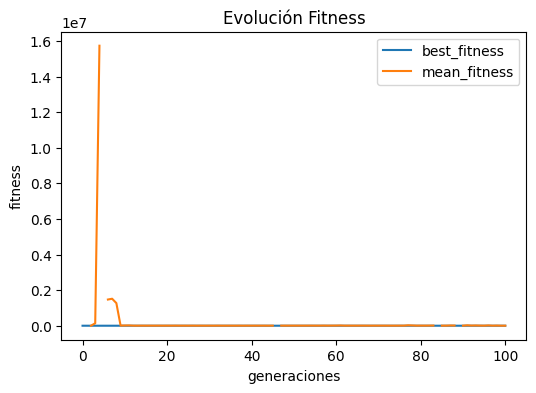

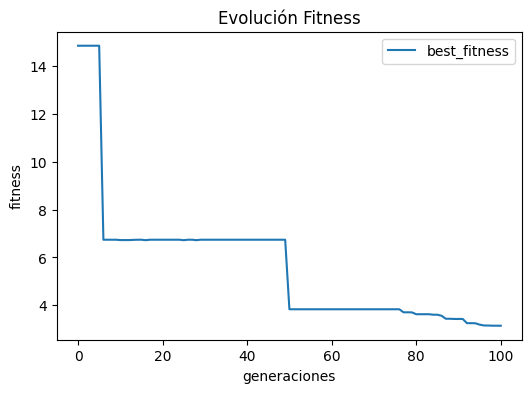

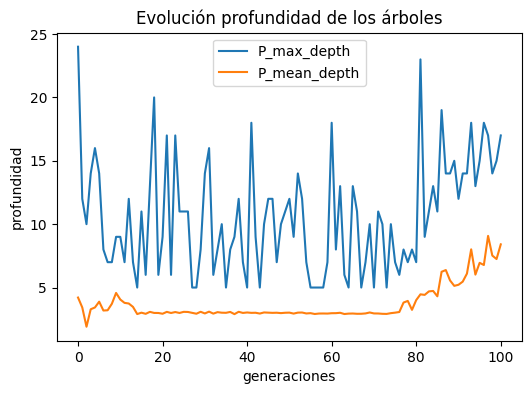

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()